# OpenCV Face Detection HDMI

In this notebook, opencv face detection will be applied to HDMI input images.

To run all cells in this notebook a HDMI input source and HDMI output monitor are required.

References:

https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

### Step 1: Load the overlay

In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *

base = BaseOverlay("base.bit")
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out


### Step 2: Initialize HDMI I/O


In [2]:
hdmi_in.configure(PIXEL_RGB)
hdmi_out.configure(hdmi_in.mode, PIXEL_RGB)

hdmi_in.start()
hdmi_out.start()


### Step 3: Show input frame using IPython Image


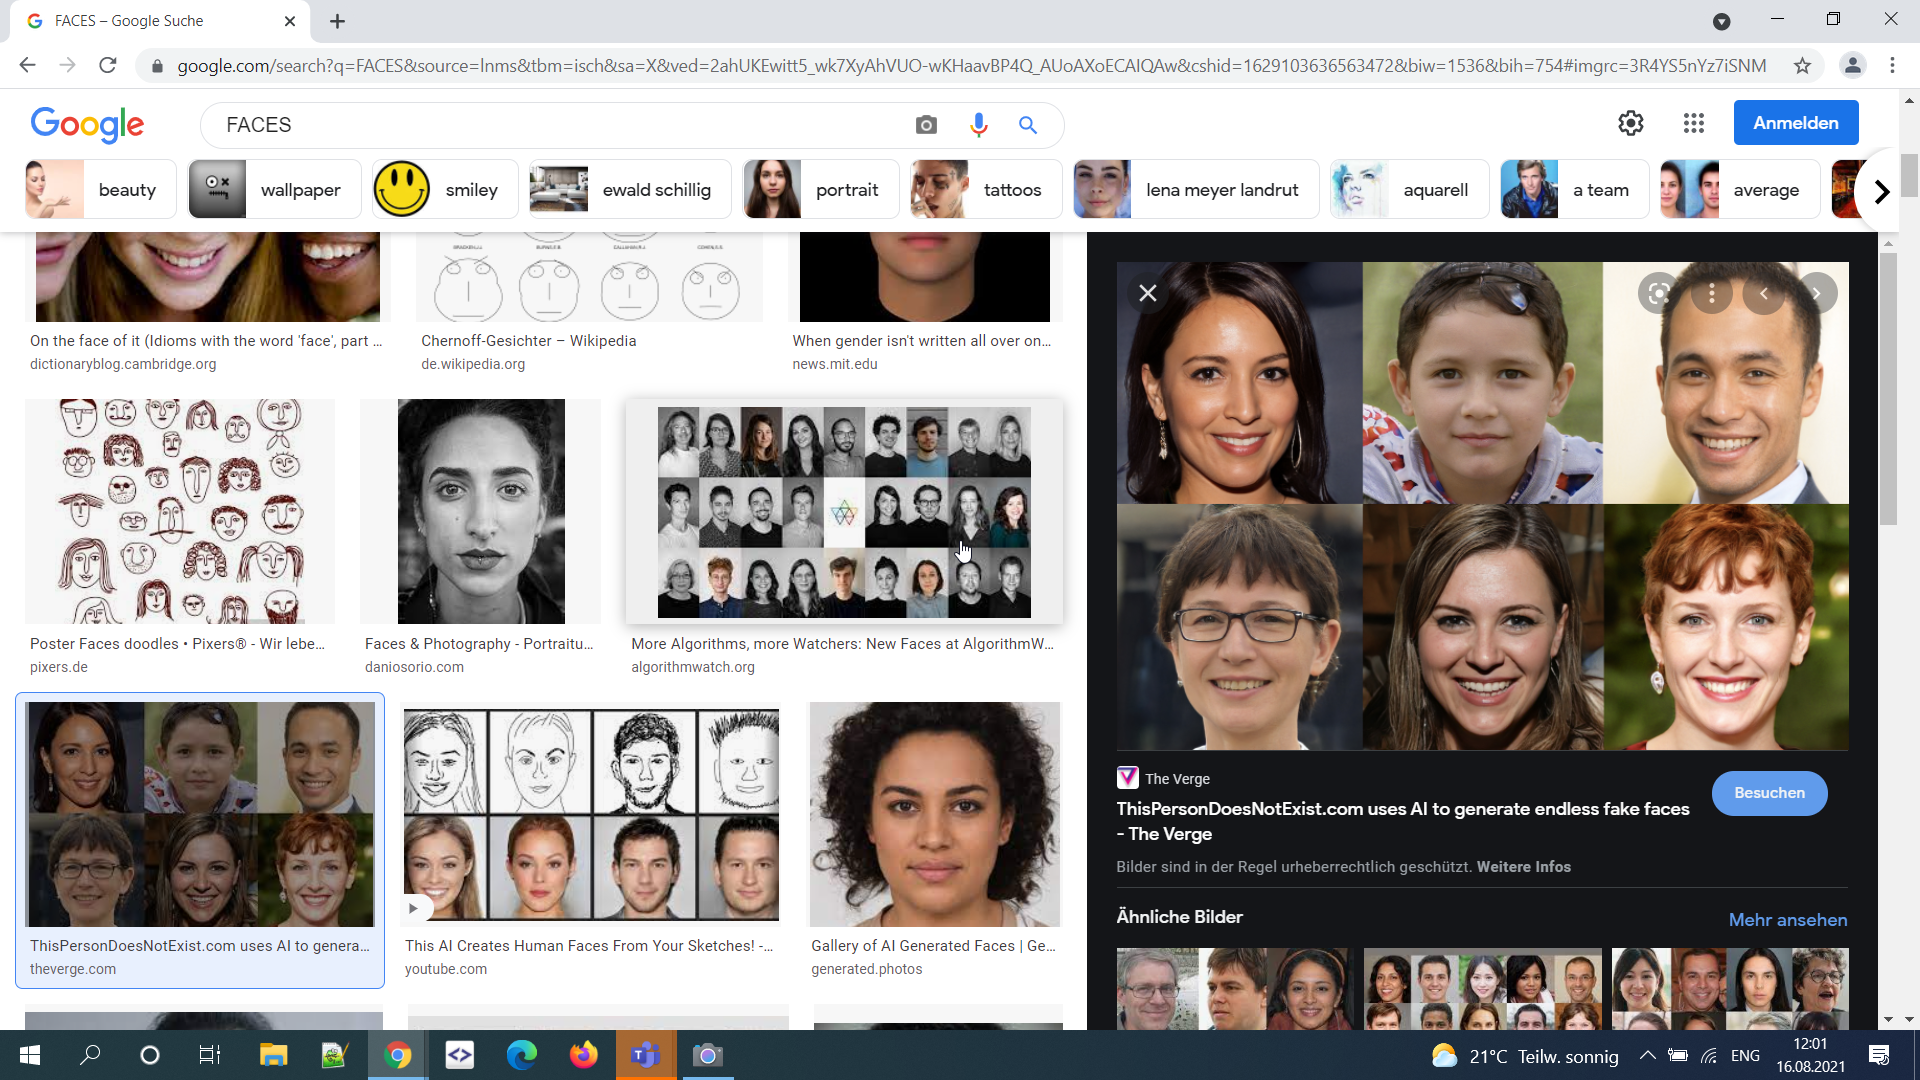

In [3]:
import PIL.Image
frame = hdmi_in.readframe()
img = PIL.Image.fromarray(frame)
# please edit the image savinbg path
#img.save("/home/xilinx/jupyter_notebooks/base/video/data/face_detect.jpg")

img

### Step 4: Apply the face detection to the input


In [4]:
import cv2
import numpy as np

frame = hdmi_in.readframe()

face_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_eye.xml')

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


### Step 5: Show results on HDMI output
Output OpenCV results via HDMI.


In [5]:
hdmi_out.writeframe(frame)


### Step 6: Show results within notebook
Output OpenCV results as JPEG.



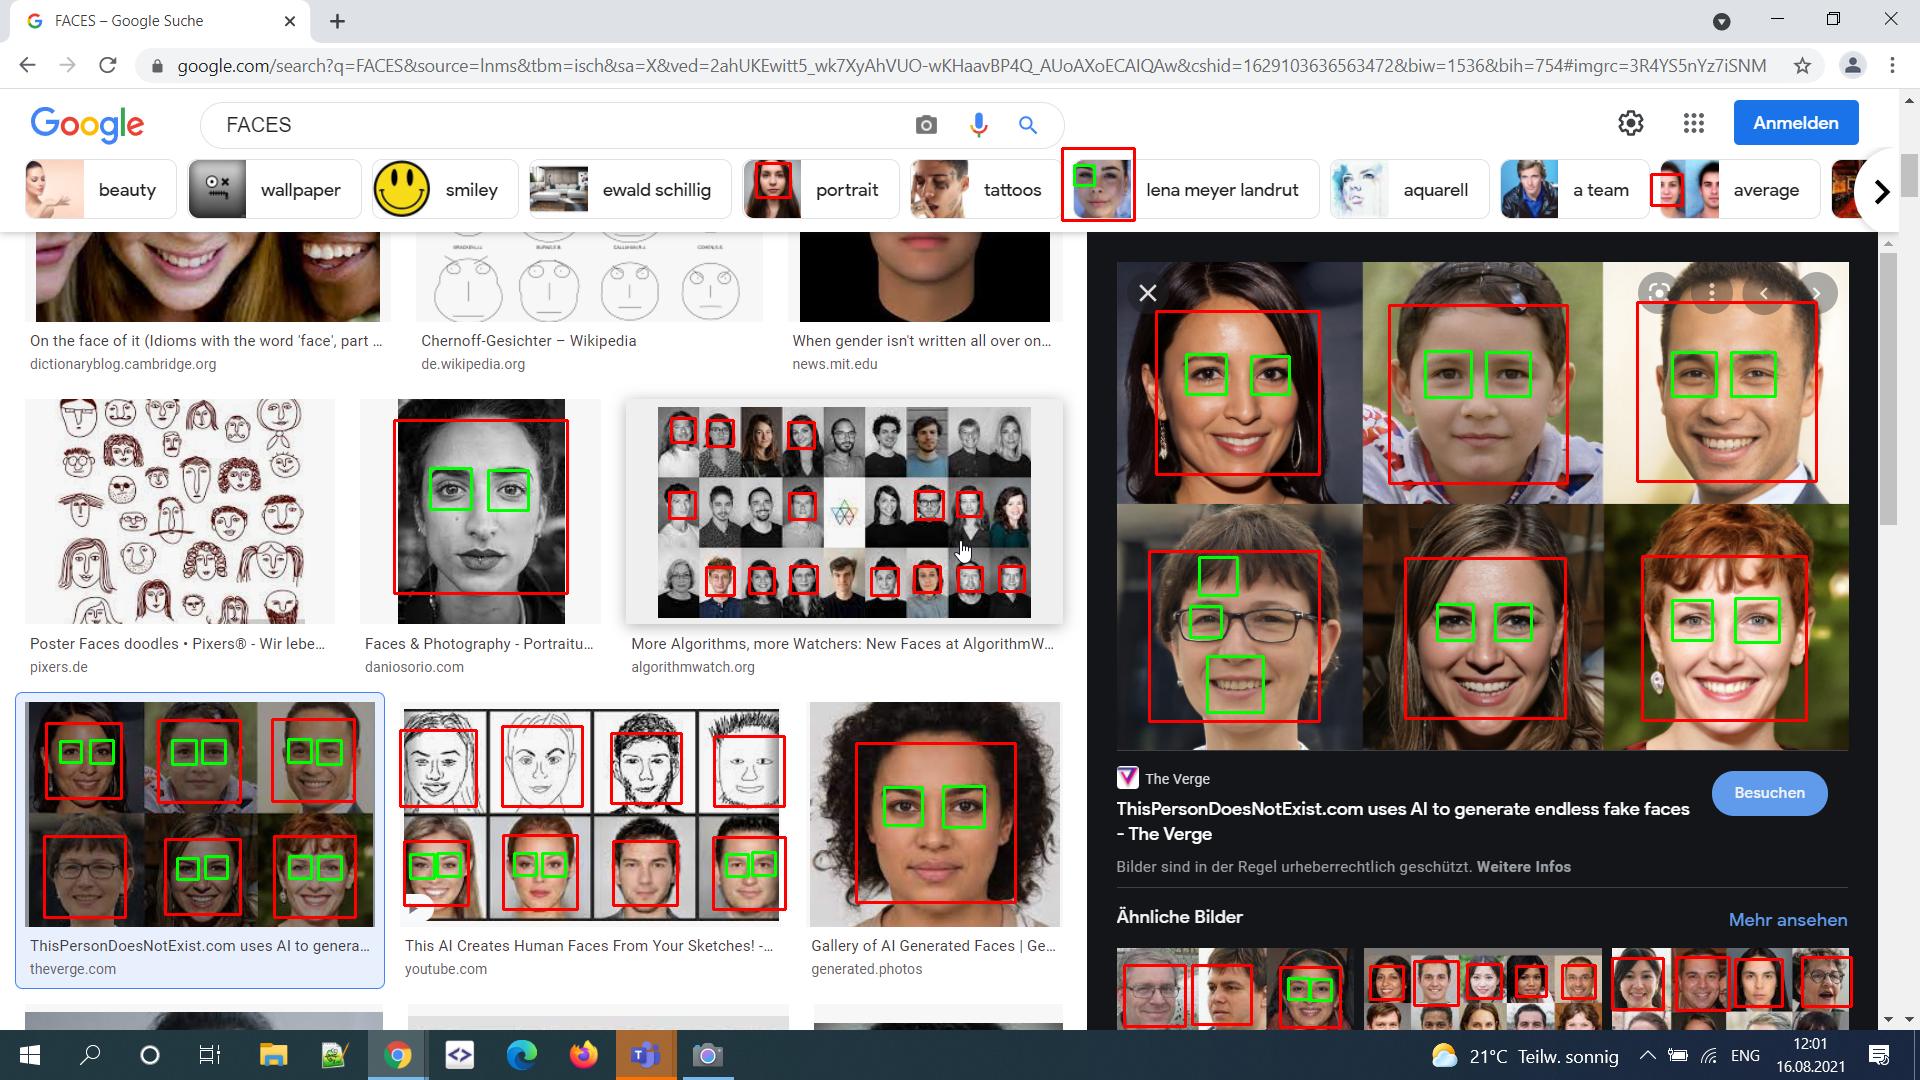

In [6]:
img = PIL.Image.fromarray(frame)
img.save("/home/xilinx/jupyter_notebooks/base/video/data/face_detect.jpg")

img



### Step 7: Release HDMI



In [ ]:
hdmi_out.stop()
hdmi_in.stop()
del hdmi_in, hdmi_out
